In [1]:
# 查看当前挂载的数据集目录 
!ls /home/aistudio/data/

data255


In [2]:
# 查看个人持久化工作区文件
!ls /home/aistudio/work/

# 1. EDA

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

In [3]:
white_wine = pd.read_csv('/home/aistudio/data/data436/winequality-white.csv',delimiter=';' )
print(white_wine.shape)
white_wine.head()

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


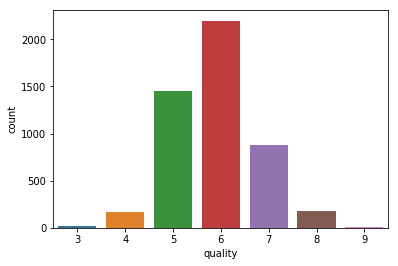

In [9]:
sns.countplot(white_wine['quality'])
# sns.countplot(data=wine_data, x='quality')

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


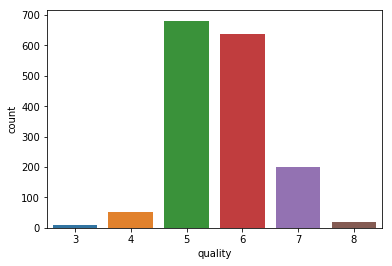

In [10]:
red_wine = pd.read_csv('/home/aistudio/data/data436/winequality-red.csv', delimiter=';')
print(red_wine.shape)
sns.countplot(red_wine['quality'])
red_wine.head()

# 2. Preprocessing

(6497, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


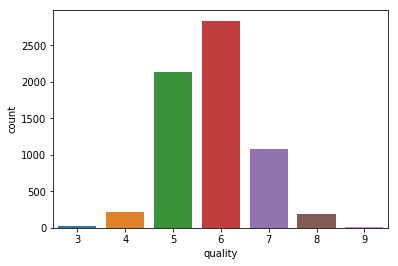

In [20]:
wine = pd.concat((white_wine,red_wine),axis=0)
print(wine.shape)
sns.countplot(wine['quality'])
wine.head()

In [26]:
wine['rank'] = wine['quality'].apply(lambda x:0 if x<6 else 1 )

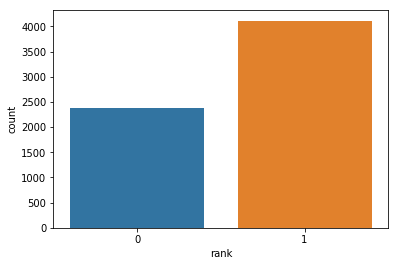

In [27]:
sns.countplot(wine['rank'])

In [32]:
wine['rank'].value_counts()

1    4113
0    2384
Name: rank, dtype: int64

In [41]:
all_cols = wine.columns.tolist()
feat_cols = all_cols[:-2]

In [43]:
X = wine[feat_cols].values
y = wine['rank'].values

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3, random_state=10)

In [46]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeling - Multi-Layer perceptron

In [60]:
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu')
mlp.fit(X_train_scaled,y_train)
accuracy = mlp.score(X_test_scaled,y_test)
print('scaled feature accuracy: {:.2f}%'.format(accuracy*100))

scaled feature accuracy: 75.25%


In [61]:
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu')
mlp.fit(X_train,y_train)
accuracy = mlp.score(X_test,y_test)
print('un-scaled feature accuracy: {:.2f}%'.format(accuracy*100))

un-scaled feature accuracy: 71.14%


# Modeling - Keras NN with nonlinear activation

In [66]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import SGD
import keras.backend as K
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
set_session(tf.Session())

In [70]:
len(feat_cols)

11

In [174]:
model = Sequential()
model.add(Dense(500, input_dim=11, kernel_initializer='glorot_normal'))
model.add(Activation('relu'))
model.add(Dense(500, kernel_initializer='glorot_normal'))
model.add(Activation('relu'))
model.add(Dense(500, kernel_initializer='glorot_uniform'))
model.add(Activation('relu'))
model.add(Dense(2, kernel_initializer='glorot_normal'))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='glorot_normal'))
model.add(Activation('sigmoid'))

In [175]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [177]:
history = model.fit(X_train_scaled,y_train, validation_data=(X_test_scaled,y_test),batch_size=128, epochs=10, verbose=1)

Train on 4331 samples, validate on 2166 samples
Epoch 1/10
4331/4331 [==============================] - 2s 472us/step - loss: 0.4934 - acc: 0.7689 - val_loss: 0.5124 - val_acc: 0.7595
Epoch 2/10
4331/4331 [==============================] - 2s 465us/step - loss: 0.4812 - acc: 0.7740 - val_loss: 0.5113 - val_acc: 0.7636
Epoch 3/10
4331/4331 [==============================] - 2s 457us/step - loss: 0.4793 - acc: 0.7767 - val_loss: 0.5112 - val_acc: 0.7581
Epoch 4/10
4331/4331 [==============================] - 2s 490us/step - loss: 0.4757 - acc: 0.7770 - val_loss: 0.5113 - val_acc: 0.7535
Epoch 5/10
4331/4331 [==============================] - 2s 465us/step - loss: 0.4729 - acc: 0.7811 - val_loss: 0.5093 - val_acc: 0.7613
Epoch 6/10
4331/4331 [==============================] - 2s 478us/step - loss: 0.4726 - acc: 0.7788 - val_loss: 0.5098 - val_acc: 0.7576
Epoch 7/10
4331/4331 [==============================] - 2s 485us/step - loss: 0.4665 - acc: 0.7850 - val_loss: 0.5105 - val_acc: 0.7498
